In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("emotion_dataset.csv")

In [4]:
df.head()

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear


In [5]:
df.shape

(422746, 2)

In [6]:
df['emotion'].unique()

array(['fear', 'sad', 'love', 'joy', 'suprise', 'anger'], dtype=object)

In [7]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [8]:
def clean_text(text):
    text = text.lower()                               # Lowercase
    text = re.sub(r'http\S+', '', text)               # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)           # Remove punctuation/numbers
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [9]:
df['clean_text'] = df['sentence'].apply(clean_text)

In [10]:
df[['sentence', 'clean_text']].head()

,sentence,clean_text
0,i just feel really helpless and heavy hearted,feel really helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,ive enjoyed able slouch relax unwind frankly n...
2,i gave up my internship with the dmrg and am f...,gave internship dmrg feeling distraught
3,i dont know i feel so lost,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,kindergarten teacher thoroughly weary job take...


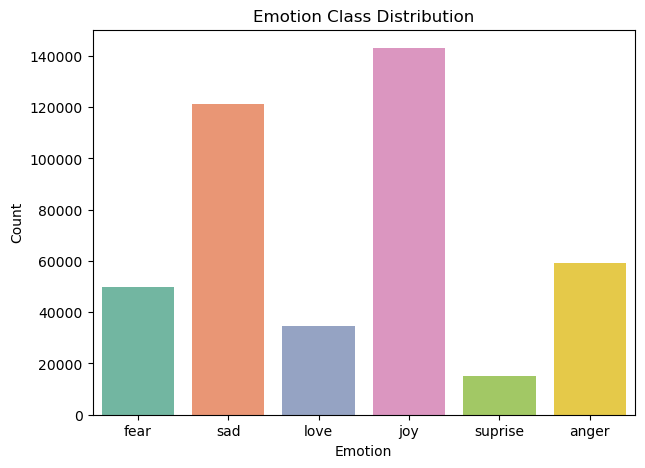

In [11]:
# Visualize Emotion Distribution
plt.figure(figsize=(7,5))
sns.countplot(x='emotion', data=df, palette='Set2')
plt.title("Emotion Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

In [12]:
#Data Split
X = df['clean_text']
y = df['emotion']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTraining Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Training Samples: 338196
Testing Samples: 84550


In [14]:
#Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [15]:
X_train_tfidf.shape

(338196, 5000)

In [16]:
# Train the Model (Logistic Regression)
model = LogisticRegression(max_iter=300)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=300)

In [17]:
# Make Predictions
y_pred = model.predict(X_test_tfidf)

In [18]:
# Evaluate the Model
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy of Emotion Detection Model: {:.2f}%".format(acc * 100))


Accuracy of Emotion Detection Model: 90.20%


In [19]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.91      0.91     11863
        fear       0.85      0.86      0.86      9930
         joy       0.92      0.94      0.93     28614
        love       0.82      0.76      0.79      6911
         sad       0.94      0.94      0.94     24238
     suprise       0.79      0.68      0.73      2994

    accuracy                           0.90     84550
   macro avg       0.87      0.85      0.86     84550
weighted avg       0.90      0.90      0.90     84550



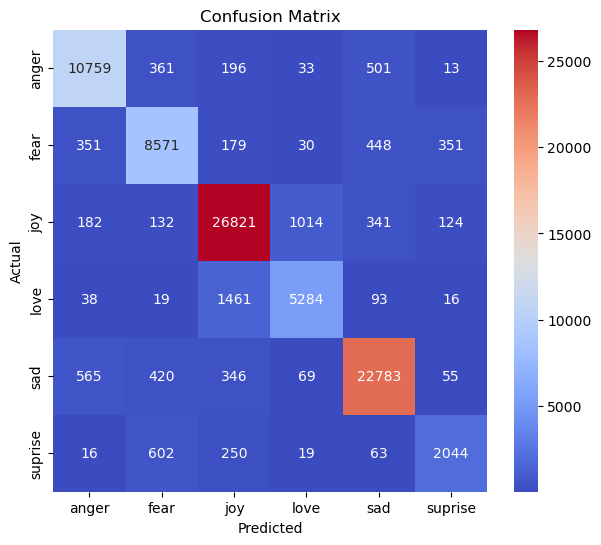

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
# Test with Custom Inputs
sample_texts = [
    "I am feeling very happy today!",
    "This is the worst day of my life.",
    "I love spending time with my friends.",
    "I am really scared about tomorrow's exam."
]

In [22]:
sample_clean = [clean_text(text) for text in sample_texts]
sample_tfidf = tfidf.transform(sample_clean)
predictions = model.predict(sample_tfidf)

In [23]:
print("\n----- Custom Predictions -----")
for text, pred in zip(sample_texts, predictions):
    print(f"Text: {text}  -->  Predicted Emotion: {pred}")


----- Custom Predictions -----
Text: I am feeling very happy today!  -->  Predicted Emotion: joy
Text: This is the worst day of my life.  -->  Predicted Emotion: joy
Text: I love spending time with my friends.  -->  Predicted Emotion: sad
Text: I am really scared about tomorrow's exam.  -->  Predicted Emotion: fear
